In [9]:
import sympy as sym
import numpy as np
from scipy.linalg import solve

# Определяем переменные
N = 3       # Количество переменных
eps = 1e-3  # Желаемая точность сходимости

# Определяем метод Ньютона
def Newton(F, Jacobian):
    curValues = np.array([10, 0.5, 0.5], dtype="float")    # Присваиваем начальные значения параметров                                                          
    FCur = F(*curValues)                                    # Вычисляем значение функции                                                                         
    JacobianCur = Jacobian(*curValues)                      # Вычисляем значение Якобиана                                                                    
    delta = solve(JacobianCur, FCur).reshape((N, ))         # Вычисляем приращение параметров                                                  
    while np.linalg.norm(delta) > eps:                      # Пока норма приращения больше желаемой точности                                                     
        curValues -= delta                                  # Обновляем значения параметров                                                                        
        FCur = F(*curValues)                                # Вычисляем значение функции                                                                      
        JacobianCur = Jacobian(*curValues)                  # Вычисляем значение Якобиана                                                                      
        delta = solve(JacobianCur, FCur).reshape((N, ))     # Вычисляем приращение параметров                                                                     
    return curValues                                        # Возвращаем полученные значения параметров                                                                        

# Определяем переменные и функции для задачи
vars = ['x', 'y', 'z']
funcs = ['x ** 2 + y ** 2 + z ** 2 - 1', '2 * x ** 2 + y ** 2 - 4 * z', '3 * x ** 2 - 4 * y + z ** 2']

# Преобразуем функции в матрицы и вычисляем Якобиан
F = sym.Matrix(funcs)
Jacobian = sym.Matrix(funcs).jacobian(vars)

# Преобразуем матрицы Якобиана и функций в лямбда-функции для численного вычисления
Jacobian = sym.lambdify(sym.symbols(vars), Jacobian)
F = sym.lambdify(sym.symbols(vars), F)

# Вычисляем решение с помощью метода Ньютона-Рафсона
values = Newton(F, Jacobian)

# Выводим решение
space = ' '
print(f"Ответ: x: {values[0]:.5f}\n{space:>10}y: {values[1]:.5f}\n{space:>10}z: {values[2]:.5f}\n")

Ответ: x: 0.78521
          y: 0.49661
          z: 0.36992



In [9]:
import math


def simpson_integration(x):
    a = 0
    b = x
    n = 100
    # Вычисляем шаг интервала
    h = (b - a) / n

    # Считаем сумму значений функции в точках x_i = a + i*h для i = 0, 1, ..., n
    sum_1 = sum(f(a + i*h) for i in range(1, n, 2))  # Сумма значений в нечётных точках
    sum_2 = sum(f(a + i*h) for i in range(2, n, 2))  # Сумма значений в чётных точках

    # Вычисляем приближенное значение интеграла методом Симпсона
    integral = (1/3) * h * (f(a) + 4*sum_1 + 2*sum_2 + f(b))

    return integral


# Определяем функцию f(x)
def f(x):
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-(x ** 2) / 2)

# Вычисляем ответ
ans = simpson_integration(float(input("Введите значение x: ")))
print(f"Ответ: {ans:.5f}")

Ответ: 0.34134


x	 y
0.0000	 1.0000
0.1000	 1.0593
0.2000	 1.1305
0.3000	 1.2167
0.4000	 1.3217
0.5000	 1.4514
0.6000	 1.6142
0.7000	 1.8226
0.8000	 2.0965
0.9000	 2.4690
1.0000	 3.0000


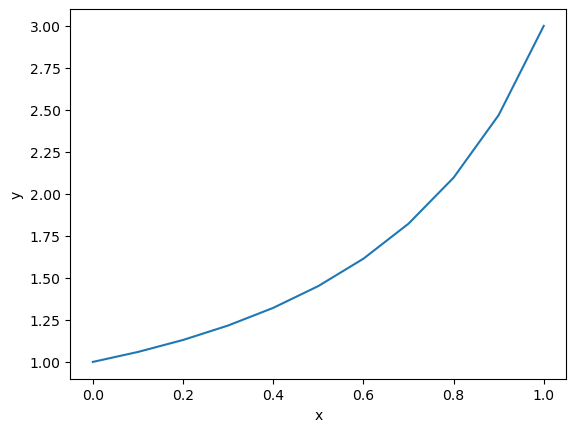

In [10]:
from math import sqrt
import numpy as np
from matplotlib import pyplot as plt


# Определяем параметры задачи
a = 0.0
b = 1.0
ya = 1.0
yb = 3.0

N = 10
h = (b - a) / N
eps = 1e-6
max_iter = 1000


# Функция для аппроксимации второй производной
def d2y(x, y):
    return (y[x - 1] - 2 * y[x] + y[x + 1]) / (h ** 2)


# Функция для вычисления функции и ее производной в каждой точке сетки
def F(y):
    f = np.zeros(N + 1)
    f[0] = y[0] - ya
    f[N] = y[N] - yb
    for i in range(1, N):
        f[i] = d2y(i, y) - y[i] ** 3 - (i * h) ** 2
    return f


# Функция для вычисления Якобиана
def diag_mat(y):
    jac = np.zeros((N + 1, N + 1))

    jac[0][0] = 1.0
    jac[N][N] = 1.0
    for i in range(1, N):
        jac[i][i - 1] = 1.0 / (h ** 2)
        jac[i][i] = -2.0 / (h ** 2) - 3.0 * y[i] ** 2
        jac[i][i + 1] = 1.0 / (h ** 2)
    return jac


def get_vector_norm(var_seq):
    sum = 0
    for i in range(2):
        sum += var_seq[i] ** 2

    return sqrt(sum)


# Процедура нахождения решения 3-х диагональной матрицы
def three_diag(jac, f):
    n = len(jac)

    x = [0 for _ in range(0, n)]  # обнуление вектора решений

    # Прямой ход
    alpha = [0 for _ in range(0, n)]
    betha = [0 for _ in range(0, n)]
    # для первой 0-й строки

    alpha[0] = jac[0][1] / (-jac[0][0])
    betha[0] = (- f[0]) / (-jac[0][0])

    for i in range(1, n - 1):
        alpha[i] = jac[i][i + 1] / (-jac[i][i] - jac[i][i - 1] * alpha[i - 1])
        betha[i] = (jac[i][i - 1] * betha[i - 1] - f[i]) / (-jac[i][i] - jac[i][i - 1] * alpha[i - 1])
    alpha[n - 1] = 0
    betha[n - 1] = (jac[n - 1][n - 2] * betha[n - 2] - f[n - 1]) / (-jac[n - 1][n - 1] - jac[n - 1][n - 2] * alpha[n - 2])

    # Обратный ход
    x[n - 1] = betha[n - 1]
    for i in range(n - 1, 0, -1):
        x[i - 1] = alpha[i - 1] * x[i] + betha[i - 1]

    return x


# Функция для решения системы нелинейных уравнений методом Ньютона
def newton_nonlinear(F, diag_mat, y, eps, max_iter):
    for _ in range(max_iter):
        f = F(y)
        jac = diag_mat(y) 

        # решаем jac * var = -f
        # dx = get_coefs(jac, -f)

        dx = three_diag(jac, -f)

        y += dx
        if get_vector_norm(dx) < eps:
            return y
    return None


# разностная сетка
x = np.linspace(a, b, N + 1)
y = np.linspace(ya, yb, N + 1)

# решаем систему нелинейных уравнений методом ньютона
y = newton_nonlinear(F, diag_mat, y, eps, max_iter)

print("x\t y")
for i in range(N + 1):
    print("{:.4f}\t {:.4f}".format(x[i], y[i]))

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
